In [1]:
import tensorflow as tf
from main_SMNN import *
import matplotlib.pyplot as plt
from keras.models import Model

2024-01-04 09:26:49.489861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-04 09:26:49.607264: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-04 09:26:49.610802: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/MonitorSoftware/lib:/usr/sfw/lib:/usr/local/lib:/opt/MonitorSoftware/lib:/usr

# MNIST dataset experiment

We load the dataset from the tensorflow library

In [2]:
(train_images, y_train), (test_images, y_test) = tf.keras.datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
len(train_images)

60000

In [4]:
len(test_images)

10000

## The model

In [5]:
num_classes = 10
input_shape = (28, 28, 1)

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(4, (5, 5), activation='relu'))
model.add(tf.keras.layers.Flatten(name="flatten"))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, y_train, epochs=10,
                    validation_data=(test_images, y_test))

2024-01-04 09:26:51.824062: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/MonitorSoftware/lib:/usr/sfw/lib:/usr/local/lib:/opt/MonitorSoftware/lib:/usr/sfw/lib:/usr/local/lib:/opt/MonitorSoftware/lib:/usr/sfw/lib:/usr/local/lib
2024-01-04 09:26:51.824219: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/MonitorSoftware/lib:/usr/sfw/lib:/usr/local/lib:/opt/MonitorSoftware/lib:/usr/sfw/lib:/usr/local/lib:/opt/MonitorSoftware/lib:/usr/sfw/lib:/usr/local/lib
2024-01-04 09:26:51.824344: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerr

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5302 - accuracy: 0.8215 - val_loss: 0.2786 - val_accuracy: 0.9108
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2381 - accuracy: 0.9258 - val_loss: 0.1845 - val_accuracy: 0.9443
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1462 - accuracy: 0.9547 - val_loss: 0.0904 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0862 - accuracy: 0.9735 - val_loss: 0.0765 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0653 - accuracy: 0.9796 - val_loss: 0.0625 - val_accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.0589 - val_accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0551 - val_ac

In [7]:
model.evaluate(test_images,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0524 - accuracy: 0.9859


[0.05236004665493965, 0.9858999848365784]

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 4)           6404      
                                                                 
 flatten (Flatten)           (None, 4)                 0

We obtain the image of the training set in the flatten layer

In [9]:
layer_name = "flatten"
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(train_images)

X=intermediate_output
X_centered = X-X.mean()
X_scaled = (X_centered-X_centered.min())/(X_centered.max()-X_centered.min())

X_train=X_scaled
data = X_train

1875/1875 [==============================] - 5s 3ms/step


We compute the dictionary with the barycentric coordinates of the transformed data respect to the maximal simplex. The simplex is subdivided two times. Hence, we will apply the methodology for three iterations.

In [10]:
bar_iterations=2
dim = np.shape(data[0])[0]
print("The dimension of the point cloud is:", dim)
d=itek_barycentrics(data,bar_iterations)
bis = [bis_cons(d,ite,dim) for ite in range(bar_iterations+1)]
dic_sups = dic_supports(supports(bar_iterations,dim))
sups = supports(bar_iterations,dim)

The dimension of the point cloud is: 4


Training of the simplicial layer

In [11]:
n_samples = len(X_train)

n_classes = len(set(y_train))
y_hot=tf.one_hot(y_train,depth=n_classes)
y_hot=np.array(y_hot)


verbose = False
epochs = 10
model0,history0=SMNN(bis[0],y_train,epochs,verbose =verbose)
print(model0.evaluate(bis[0],y_hot))
vsi = [bis_cons(itek_barycentrics(sups[i],i),i,dim) for i in range(bar_iterations)]
vs0 = np.matmul(vsi[0],model0.get_weights())
weights0=vs0 

model1,history1=SMNN(bis[1],y_train,epochs,weights0,verbose =verbose)
print(model1.evaluate(bis[1],y_hot))
vs1=np.matmul(vsi[1],model1.get_weights())
weights1=vs1

model2,history2=SMNN(bis[2],y_train,epochs,weights1,verbose =verbose)
print(model2.evaluate(bis[2],y_hot))

Training neural network...
1875/1875 [==============================] - 2s 814us/step - loss: 0.3877 - accuracy: 0.9798
[0.38772347569465637, 0.9797833561897278]
Training neural network...
1875/1875 [==============================] - 2s 881us/step - loss: 0.0424 - accuracy: 0.9925
[0.042417265474796295, 0.9924833178520203]
Training neural network...
1875/1875 [==============================] - 2s 895us/step - loss: 0.0222 - accuracy: 0.9946
[0.022190045565366745, 0.9946333169937134]


Plot of the training:

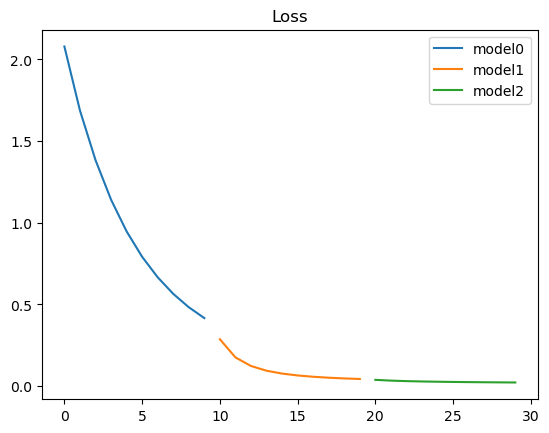

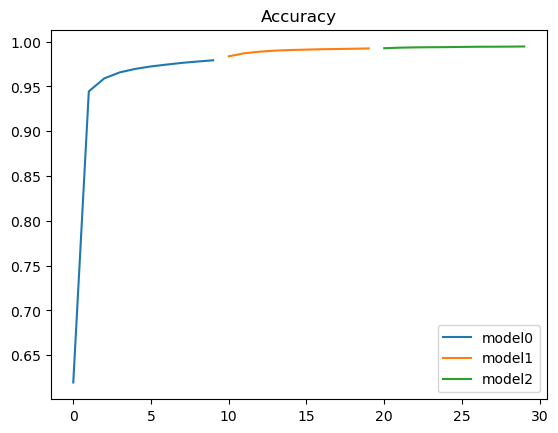

In [12]:
plt.plot(history0.history['loss'])
plt.plot(range(epochs,2*epochs),history1.history['loss'])
plt.plot(range(2*epochs,3*epochs),history2.history['loss'])
#plt.plot(range(3*epochs,4*epochs),history3.history['loss'])
plt.legend(["model0","model1","model2","model3"])
plt.title("Loss")
plt.show()


plt.plot(history0.history['accuracy'])
plt.plot(range(epochs,2*epochs),history1.history['accuracy'])
plt.plot(range(2*epochs,3*epochs),history2.history['accuracy'])
#plt.plot(range(3*epochs,4*epochs),history3.history['accuracy'])
plt.legend(["model0","model1","model2","model3"])
plt.title("Accuracy")
plt.show()

In [13]:
history0.history["loss"]

[2.079474925994873,
 1.6879180669784546,
 1.3843021392822266,
 1.1419123411178589,
 0.9477370977401733,
 0.7919870615005493,
 0.6665041446685791,
 0.5651233792304993,
 0.4832114577293396,
 0.41675519943237305]

In [14]:
history1.history["loss"]

[0.2873554825782776,
 0.17605513334274292,
 0.12348604947328568,
 0.09452982246875763,
 0.07705286145210266,
 0.06554457545280457,
 0.057562608271837234,
 0.05173886567354202,
 0.047356802970170975,
 0.043927595019340515]

In [15]:
history2.history["loss"]

[0.03865708038210869,
 0.03386640176177025,
 0.030859868973493576,
 0.028715329244732857,
 0.027115100994706154,
 0.025827977806329727,
 0.024785742163658142,
 0.023914819583296776,
 0.023177115246653557,
 0.022539611905813217]

In [24]:
model0.get_weights()

[array([[  4.0420527 ,  -0.5083163 ,  -3.0631752 ,  -6.158494  ,
           2.512896  ,  -2.3466065 ,  -0.3085461 ,   0.89491427,
           0.5930938 ,   1.5404149 ],
        [-36.1469    ,  -9.637846  ,  11.107308  ,  18.459406  ,
         -34.4841    ,  -8.397716  , -35.911213  ,  17.634054  ,
          10.689755  ,  -3.3198645 ],
        [-31.708952  ,   4.012899  , -34.873116  ,  14.507878  ,
         -20.79035   ,  21.735651  , -11.151547  , -29.796036  ,
         -28.95795   ,  18.33491   ],
        [-10.698112  , -12.961752  ,  12.917259  ,   6.8789277 ,
         -35.923843  ,  14.0394535 ,  20.917553  , -35.000473  ,
           9.926088  , -35.87597   ],
        [-35.325176  ,  19.053722  ,  15.583514  ,   7.672326  ,
          12.449806  , -26.083225  ,   2.6334734 ,  -2.3139484 ,
         -36.025948  , -23.803415  ]], dtype=float32)]

In [25]:
model1.get_weights()

[array([[  5.316545  ,  -2.0144103 ,  -2.643078  ,  -6.7498603 ,
           2.991592  ,  -2.6903498 ,  -1.2363046 ,   1.0749316 ,
           0.65299386,   1.5500863 ],
        [-31.289783  , -24.706491  ,  -0.72814435,  14.062512  ,
         -30.215942  , -18.882317  , -37.237     ,  23.543346  ,
           3.9716058 , -10.864559  ],
        [-35.453526  , -19.76328   , -23.35996   ,  15.512783  ,
         -38.224995  ,  -4.4251075 , -31.85203   , -13.808389  ,
         -13.31614   ,  21.460938  ],
        [-29.799572  , -20.819904  , -24.590694  ,  11.097629  ,
         -32.679432  ,  11.737508  , -11.971079  , -21.855186  ,
           2.5175257 , -12.68325   ],
        [-33.41034   ,   9.783988  ,  -6.10112   ,  17.912565  ,
         -40.295555  ,   1.1173197 , -12.732111  , -17.472504  ,
         -12.815001  , -16.409468  ],
        [-43.009537  ,   5.7905693 , -30.243141  ,   5.044256  ,
         -12.249709  , -25.697077  , -36.95475   ,  -7.7544565 ,
         -23.845118  ,   7.501

In [26]:
model2.get_weights()

[array([[  5.647272  ,  -2.108969  ,  -2.5021975 , ...,   0.8561042 ,
           1.1299819 ,   1.7023611 ],
        [-19.906616  , -22.902292  ,  -6.861882  , ...,  19.152966  ,
          -0.25935006, -10.938184  ],
        [-23.215076  , -18.14042   , -12.157245  , ...,   6.043435  ,
          -4.526513  ,   2.1213925 ],
        ...,
        [-29.414476  ,   8.812996  ,   5.402167  , ..., -15.203454  ,
         -20.060871  , -20.958517  ],
        [-28.179338  ,   6.3961883 ,   7.223382  , ..., -13.927603  ,
         -19.630123  , -19.64767   ],
        [-29.225538  ,   7.073748  ,   4.5584817 , ..., -14.636583  ,
         -18.2671    , -19.00003   ]], dtype=float32)]

Evaluation on the test

In [16]:
intermediate_output = intermediate_layer_model.predict(test_images)

X=intermediate_output
X_centered = X-X.mean()
X_scaled = (X_centered-X_centered.min())/(X_centered.max()-X_centered.min())
X_test=X_scaled

data_test = X_test

d_test=itek_barycentrics(data_test,bar_iterations)

bis_test = [bis_cons(d_test,ite,dim) for ite in range(bar_iterations+1)]



yt_hot=tf.one_hot(y_test,depth=n_classes)
yt_hot=np.array(yt_hot)
print("Evaluation on test")
print("Model 0")
metrics = model0.evaluate(bis_test[0],yt_hot,verbose=False)
print("Loss:",metrics[0],"- Accuracy:", metrics[1])
print("Model 1")
metrics = model1.evaluate(bis_test[1],yt_hot,verbose=False)
print("Loss:",metrics[0],"- Accuracy:", metrics[1])
print("Model 2")
metrics = model2.evaluate(bis_test[2],yt_hot,verbose=False)
print("Loss:",metrics[0],"- Accuracy:", metrics[1])

313/313 [==============================] - 1s 3ms/step
Evaluation on test
Model 0
Loss: 0.44567620754241943 - Accuracy: 0.9689000248908997
Model 1
Loss: 0.06793674826622009 - Accuracy: 0.9833999872207642
Model 2
Loss: 0.050684910267591476 - Accuracy: 0.9847000241279602


Image 0


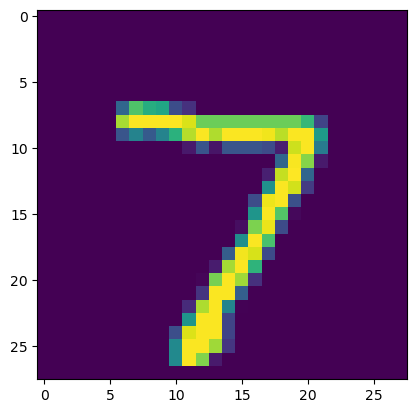

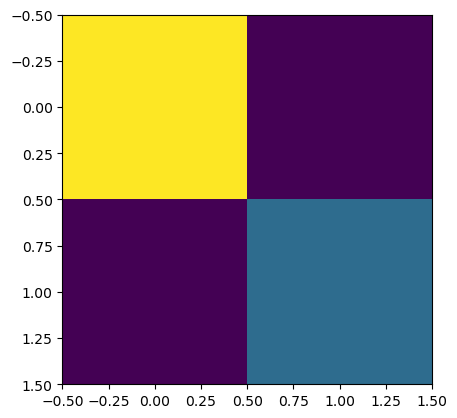

Image 1


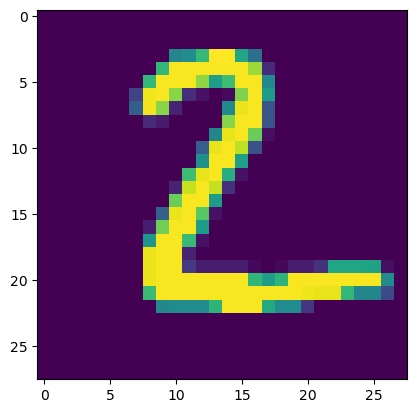

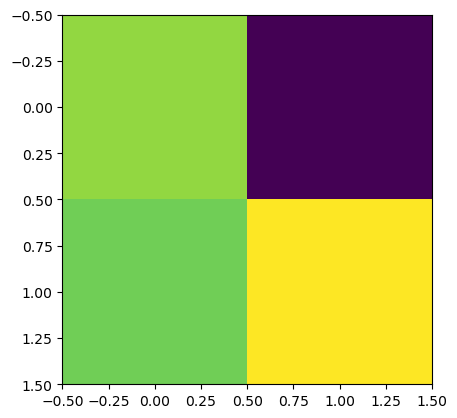

Image 2


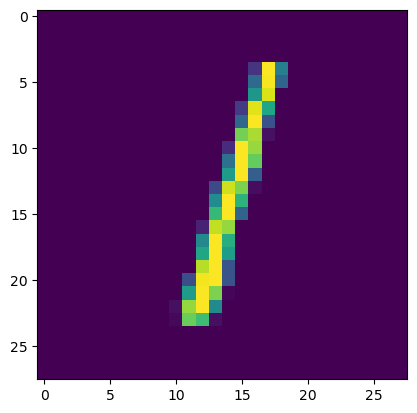

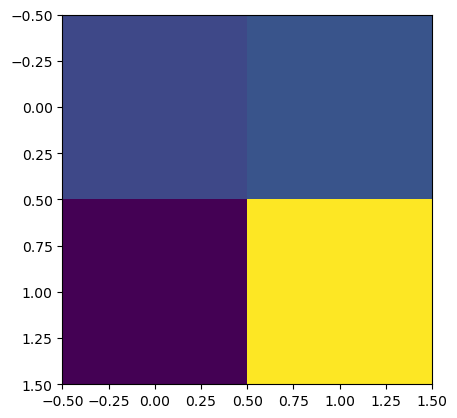

Image 3


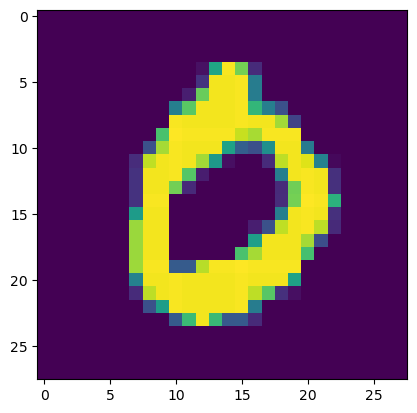

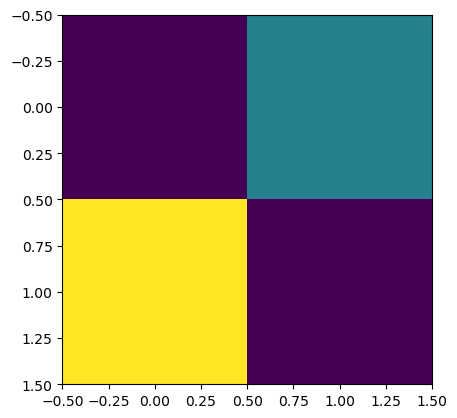

Image 4


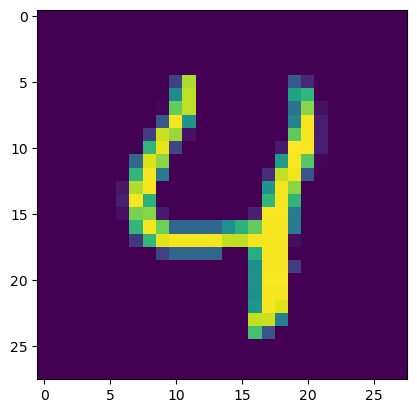

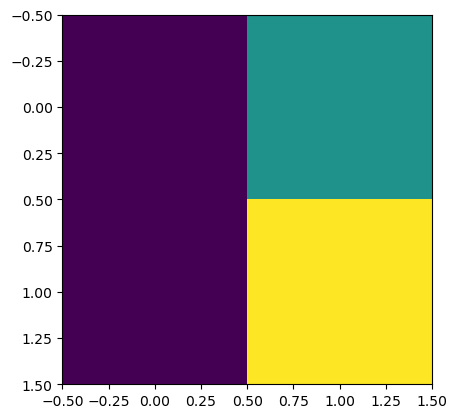

Image 5


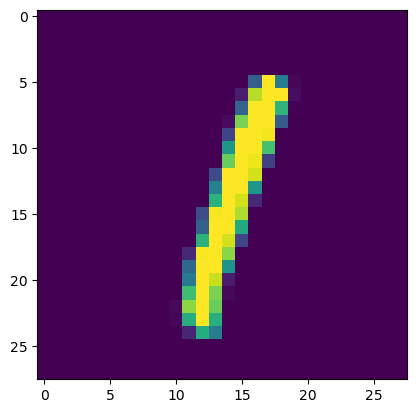

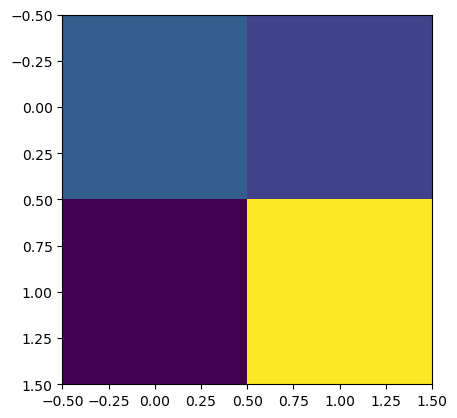

Image 6


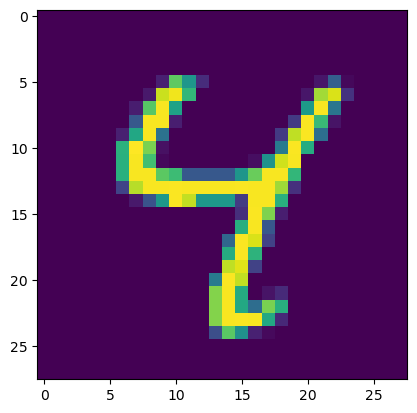

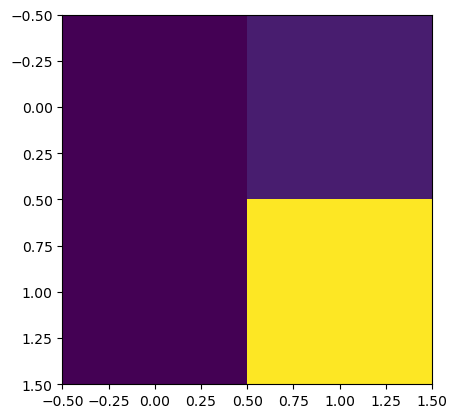

Image 7


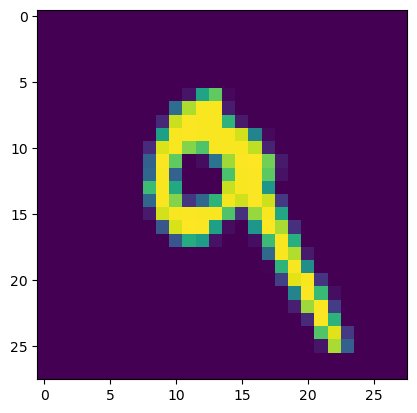

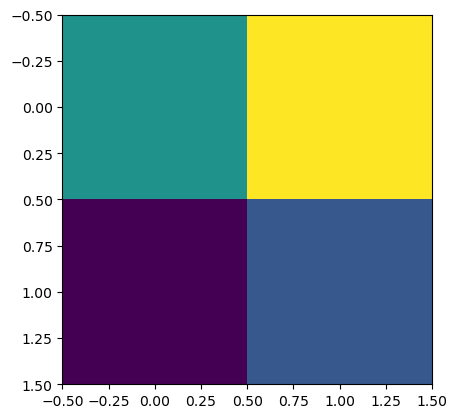

Image 8


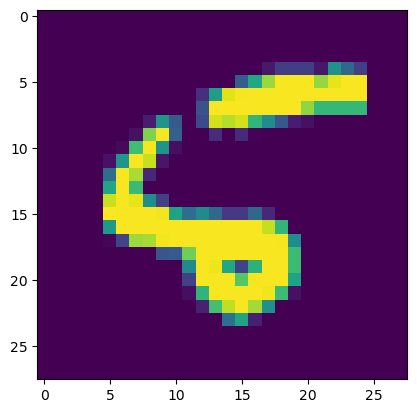

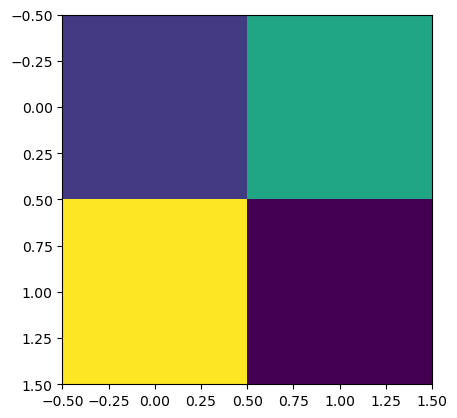

Image 9


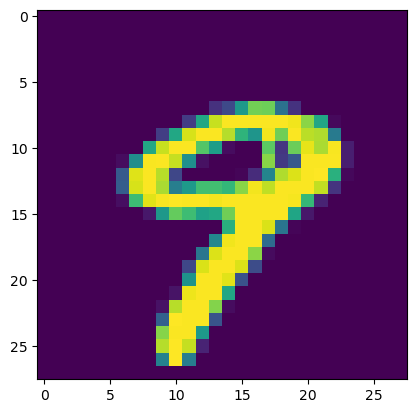

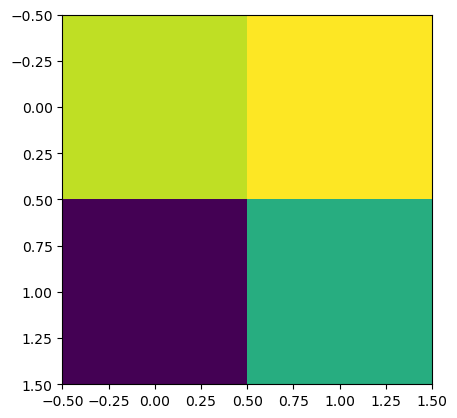

In [23]:
for i in range(10):
    print("Image",i)
    plt.imshow(test_images[i])
    plt.show()
    plt.imshow(np.reshape(intermediate_output[i],(2,2)))
    plt.show()